In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

#renaming modules 
logreg = LogisticRegression()

In [2]:
def plot_correlation_map( df ):
    corr = merge_df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
#from kaggle.com "Titanic An Interactive Data Science Tutorial"

In [3]:
bmx_df = pd.read_csv('NHANES_data/csv/bmx_i.csv')
# ^ body measurements file
demo_df = pd.read_csv('NHANES_data/csv/demo_i.csv')
# ^ demographics data

In [4]:
bmx_df.columns.values

array(['SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM',
       'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC',
       'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC',
       'BMXWAIST', 'BMIWAIST', 'BMXSAD1', 'BMXSAD2', 'BMXSAD3', 'BMXSAD4',
       'BMDAVSAD', 'BMDSADCM'], dtype=object)

In [5]:
demo_df.columns.values

array(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ',
       'DMQADFC', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3',
       'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'SIALANG', 'SIAPROXY',
       'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG',
       'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ',
       'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
       'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR',
       'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2',
       'INDFMPIR'], dtype=object)

In [6]:
bmx_df = bmx_df.drop(['BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMDBMIC', 'BMIHT', 'BMILEG', 'BMIARML',
    'BMIARMC', 'BMIWAIST', 'BMDSADCM',
    'BMDSTATS', 'BMXSAD1', 'BMXSAD2', 'BMXSAD3', 'BMXSAD4', 'BMIWT',
                     ], axis=1)
demo_df = demo_df.drop(['SDDSRVYR', 'RIDSTATR', 'RIDAGEMN', 'RIDRETH1', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC',
    'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP',
    'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE',
    'DMDHRBR4', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR',
    'DMDHRGND', 'DMDHRAGE', 'DMDHREDU', 'DMDHRMAR','DMDHSEDU', 'DMDMARTL', 'DMDEDUC3', 'DMDEDUC2',               
                    ], axis=1)

In [7]:
merge_df = pd.merge(demo_df, bmx_df, how='inner')

In [8]:
merge_df.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMDAVSAD
count,1.116800e+04,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000,11168.000000
mean,7.581835e+04,1.581304,30.727077,3.184456,52.829137,145.761372,23.509653,29.805704,31.404576,26.726254,76.058363,15.758301
std,3.138974e+04,0.493368,22.989024,1.553500,37.349890,44.855141,9.710888,16.082163,9.843889,9.511057,33.669808,9.584680
min,3.687825e-40,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.495375e+04,1.000000,11.000000,2.000000,16.200000,146.600000,19.400000,30.875000,30.000000,22.300000,65.000000,13.200000
50%,8.787650e+04,2.000000,24.000000,3.000000,58.800000,162.800000,22.400000,37.600000,33.800000,26.700000,77.600000,16.900000
75%,9.079325e+04,2.000000,48.000000,4.000000,80.000000,167.900000,29.000000,39.400000,37.400000,32.900000,98.500000,22.300000
max,9.370200e+04,2.000000,80.000000,7.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,40.800000


In [9]:
merge_df.columns.values

array(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'BMXWT', 'BMXHT',
       'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'BMDAVSAD'], dtype=object)

# Dictionary

- SEQN = respondant sequence number
- RIAGENDR = gender (1=male, 2=female)
- RIDAGEYR = age
- RIDRETH3 = race (1=MexicanAmerican, 2=Other Hispanic, 3=Non-Hispanic White, 4=Non-Hispanic Black, 6=Non-Hispanic Asian, 7=Other inc. multi-racial)
- DMDEDUC3 = education6-19 (0=none/kindergarten, 1=1st, 2=2nd, 3=3rd, 4=4th, 5=5th, 6=6th, 7=7th, 8=8th, 9=9th, 10=10th, 11=11th, 12=12th, 13=HSGraduate, 14=GED or equiv, 15=More than HS, 55=lessthan5th, 66=lessthann9th, 77=refused, 99=don'tknow, .=missing
- DMDEDUC2 = education20+ (1=lessthan9th, 2=9-11th/12th w/ no diploma, 3=HS grad or GED, 4=Some college/AA equiv, 5=College grad, 7=refused, 9=don't know, .=missing
- DMDMARTL = marital status (1=married, 2=widowed, 3=divorced, 4=seperated, 5=nvr married, 6=living w/ partner, 77 = refused, 99=don't know

- BMXWT = weight (KG)
- BMXHT = height (cm)
- BMXBMI = BMI (kg/m**2)
- BMXLEG = upper leg length(cm)
- BMXARML = upper arm length(cm)
- BMXARMC = arm circumference(cm)
- BMXWASIT = waist circumference(cm)
- BMXSAD1-4 = sagittal abdominal diameter (cm)
- BMXAVSAD = avg. sagittal abdominal diameter (cm) good <=25cm; bad >=30cm

# Fixing category values

In [10]:
merge_df = pd.get_dummies(merge_df,columns=["RIDRETH3", "RIAGENDR"], drop_first=True )

In [11]:
merge_df.columns.values

array(['SEQN', 'RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML',
       'BMXARMC', 'BMXWAIST', 'BMDAVSAD', 'RIDRETH3_2', 'RIDRETH3_3',
       'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2'], dtype=object)

# Dropping values from features

In [12]:
merge_df[merge_df['RIDAGEYR'] <= 7] = np.NaN
merge_df[merge_df['BMXWT'] <= 1] = np.NaN
merge_df[merge_df['BMXHT'] <= 0] = np.NaN
merge_df[merge_df['BMXBMI'] <= 0] = np.NaN
merge_df[merge_df['BMXLEG'] <= 0] = np.NaN
merge_df[merge_df['BMXARML'] <= 0] = np.NaN
merge_df[merge_df['BMXARMC'] <= 0] = np.NaN
merge_df[merge_df['BMXWAIST'] <= 0] = np.NaN
merge_df[merge_df['BMDAVSAD'] <= 0] = np.NaN

merge_df = merge_df.dropna()

merge_df.describe()

,SEQN,RIDAGEYR,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMDAVSAD,RIDRETH3_2,RIDRETH3_3,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,RIAGENDR_2
count,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000
mean,88726.754813,38.608771,73.888710,162.997988,27.316949,38.124663,36.166811,31.229975,93.146374,21.228745,0.133594,0.314228,0.214069,0.111304,0.042264,0.502678
std,2876.609802,22.020979,24.364478,13.005450,7.267979,4.165021,3.581956,6.084942,19.279862,4.977972,0.340240,0.464241,0.410204,0.314531,0.201205,0.500029
min,83732.000000,8.000000,17.700000,111.800000,12.300000,24.000000,22.500000,15.200000,45.200000,9.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86229.000000,17.000000,58.200000,155.600000,22.100000,35.300000,34.000000,27.100000,79.200000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88743.000000,37.000000,72.300000,163.900000,26.500000,38.300000,36.500000,31.200000,93.000000,20.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,91217.000000,57.000000,88.200000,172.000000,31.400000,41.000000,38.600000,35.300000,105.600000,24.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,93702.000000,80.000000,198.900000,202.700000,64.600000,51.100000,47.400000,54.400000,171.600000,40.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6909 entries, 0 to 9543
Data columns (total 16 columns):
SEQN          6909 non-null float64
RIDAGEYR      6909 non-null float64
BMXWT         6909 non-null float64
BMXHT         6909 non-null float64
BMXBMI        6909 non-null float64
BMXLEG        6909 non-null float64
BMXARML       6909 non-null float64
BMXARMC       6909 non-null float64
BMXWAIST      6909 non-null float64
BMDAVSAD      6909 non-null float64
RIDRETH3_2    6909 non-null float64
RIDRETH3_3    6909 non-null float64
RIDRETH3_4    6909 non-null float64
RIDRETH3_6    6909 non-null float64
RIDRETH3_7    6909 non-null float64
RIAGENDR_2    6909 non-null float64
dtypes: float64(16)
memory usage: 917.6 KB


# Visualizing Heat Maps

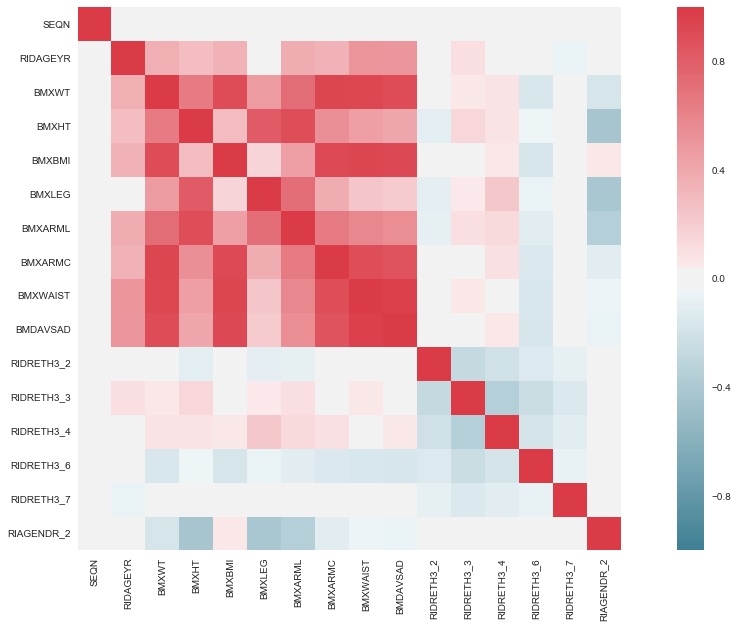

In [14]:
f, ax = plt.subplots(figsize=(20, 10))
corr = merge_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [15]:
merge_df.head()

,SEQN,RIDAGEYR,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMDAVSAD,RIDRETH3_2,RIDRETH3_3,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,RIAGENDR_2
0,83732.0,62.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,22.8,0.0,1.0,0.0,0.0,0.0,0.0
1,83733.0,53.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,27.3,0.0,1.0,0.0,0.0,0.0,0.0
2,83734.0,78.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,26.6,0.0,1.0,0.0,0.0,0.0,0.0
3,83735.0,56.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,25.1,0.0,1.0,0.0,0.0,0.0,1.0
5,83737.0,72.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,23.1,0.0,0.0,0.0,0.0,0.0,1.0


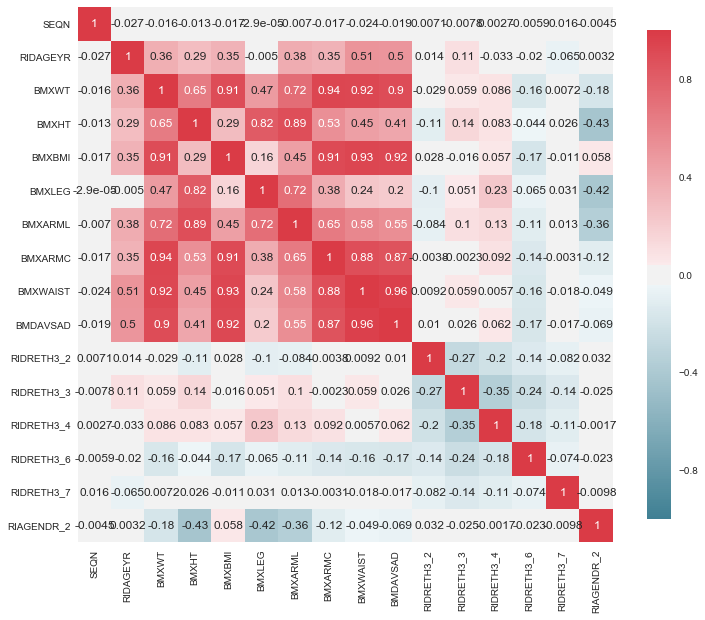

In [16]:
plot_correlation_map(merge_df)

In [17]:
merge_df[['RIDAGEYR', 'BMDAVSAD']].groupby(['RIDAGEYR'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,RIDAGEYR,BMDAVSAD
0,8.0,14.323041
1,9.0,14.911282
2,10.0,15.811765
3,11.0,16.466667
4,12.0,17.193377
5,13.0,17.532143
6,14.0,18.173964
7,15.0,18.310256
8,16.0,18.520000
9,17.0,19.000000


In [18]:
merge_df[['BMXWT', 'BMDAVSAD']].groupby(['BMXWT'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,BMXWT,BMDAVSAD
0,17.7,9.800000
1,17.9,11.200000
2,19.2,12.800000
3,20.1,12.450000
4,20.3,11.600000
5,20.7,10.900000
6,20.9,13.100000
7,21.4,12.800000
8,21.5,9.600000
9,21.6,10.600000


In [19]:
merge_df[['BMXBMI', 'BMDAVSAD']].groupby(['BMXBMI'], as_index=False).mean()#.sort_values(by='BMXBMI', ascending=False)

,BMXBMI,BMDAVSAD
0,12.3,10.500000
1,12.7,13.100000
2,12.9,10.900000
3,13.1,12.400000
4,13.3,11.300000
5,13.4,11.550000
6,13.5,10.800000
7,13.7,11.350000
8,13.8,12.200000
9,13.9,11.433333


In [20]:
merge_df[['BMXLEG', 'BMDAVSAD']].groupby(['BMXLEG'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,BMXLEG,BMDAVSAD
0,24.0,12.800000
1,25.2,12.000000
2,25.3,13.000000
3,25.4,9.800000
4,25.5,12.300000
5,26.0,26.400000
6,26.2,13.000000
7,26.3,10.600000
8,26.4,24.200000
9,26.5,11.933333


In [21]:
merge_df[['BMXARML', 'BMDAVSAD']].groupby(['BMXARML'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,BMXARML,BMDAVSAD
0,22.5,12.800000
1,23.0,9.600000
2,23.5,12.000000
3,24.0,14.250000
4,24.5,13.100000
5,24.6,10.200000
6,24.8,11.600000
7,25.0,12.366667
8,25.2,12.375000
9,25.3,13.350000


In [22]:
merge_df[['BMXARMC', 'BMDAVSAD']].groupby(['BMXARMC'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,BMXARMC,BMDAVSAD
0,15.2,11.400000
1,15.4,9.800000
2,16.4,10.900000
3,16.5,12.400000
4,16.6,11.500000
5,16.7,12.750000
6,16.8,10.800000
7,16.9,12.450000
8,17.0,11.700000
9,17.1,18.300000


In [23]:
merge_df[['BMXWAIST', 'BMDAVSAD']].groupby(['BMXWAIST'], as_index=False).mean()#.sort_values(by='BMDAVSAD', ascending=False)

,BMXWAIST,BMDAVSAD
0,45.2,9.800000
1,48.9,11.200000
2,49.1,11.600000
3,49.5,10.900000
4,49.9,10.600000
5,50.9,11.500000
6,51.0,13.900000
7,51.1,11.600000
8,51.5,11.325000
9,51.7,11.600000


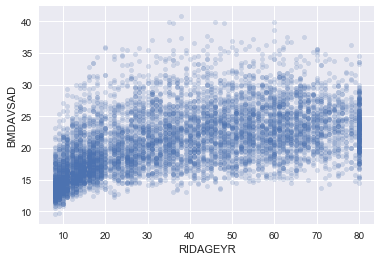

In [24]:
merge_df.plot(kind='scatter', x='RIDAGEYR', y='BMDAVSAD', alpha=0.2)

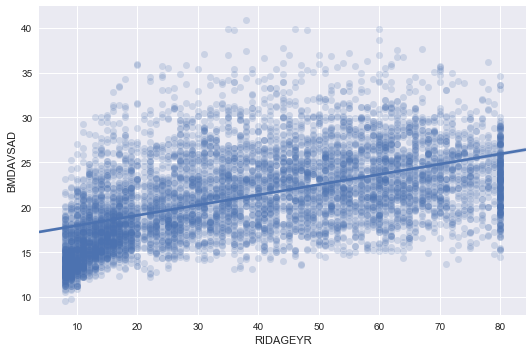

In [25]:
sns.lmplot(x='RIDAGEYR', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

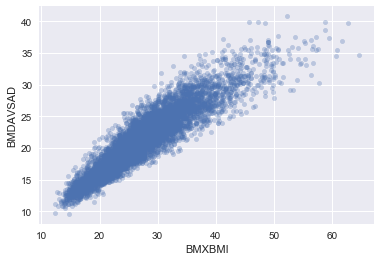

In [26]:
merge_df.plot(kind='scatter', x='BMXBMI', y='BMDAVSAD', alpha=0.3)

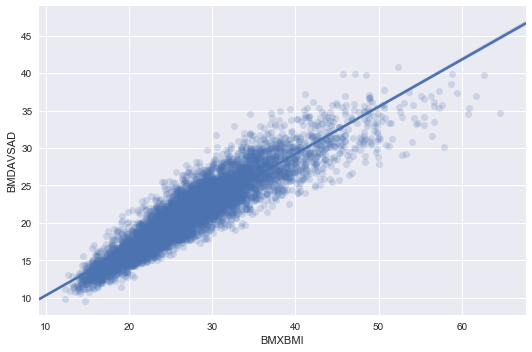

In [27]:
sns.lmplot(x='BMXBMI', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

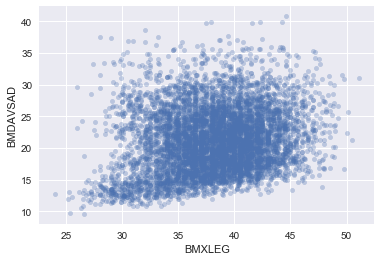

In [28]:
merge_df.plot(kind='scatter', x='BMXLEG', y='BMDAVSAD', alpha=0.3)

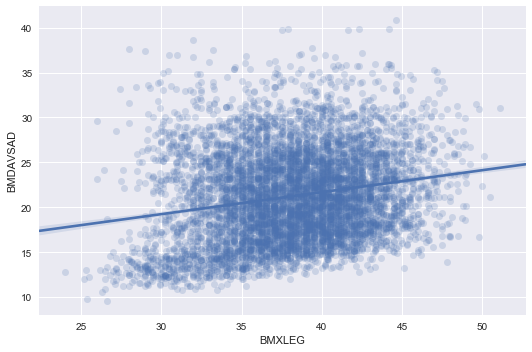

In [29]:
sns.lmplot(x='BMXLEG', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

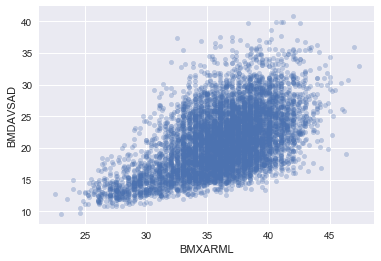

In [30]:
merge_df.plot(kind='scatter', x='BMXARML', y='BMDAVSAD', alpha=0.3)

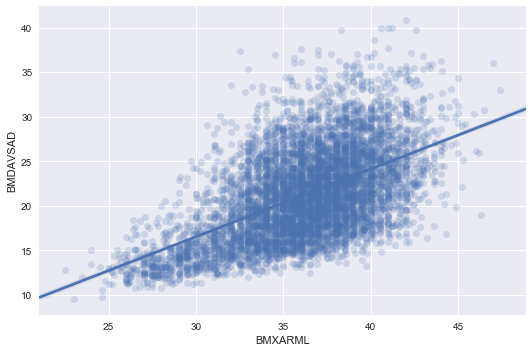

In [31]:
sns.lmplot(x='BMXARML', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

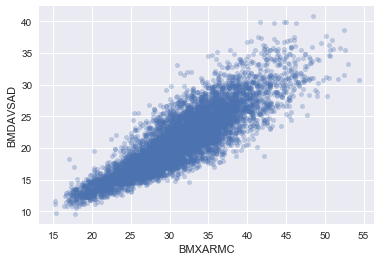

In [32]:
merge_df.plot(kind='scatter', x='BMXARMC', y='BMDAVSAD', alpha=0.3)

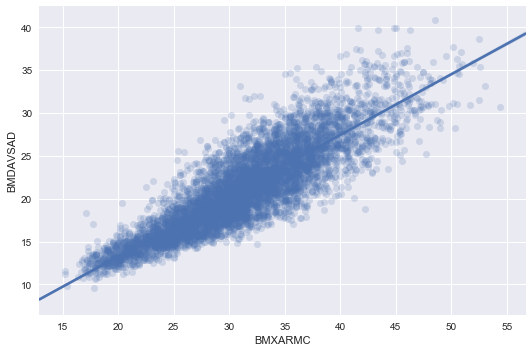

In [33]:
sns.lmplot(x='BMXARMC', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

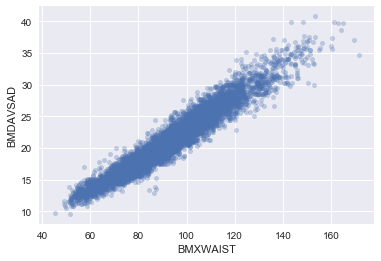

In [34]:
merge_df.plot(kind='scatter', x='BMXWAIST', y='BMDAVSAD', alpha=0.3)

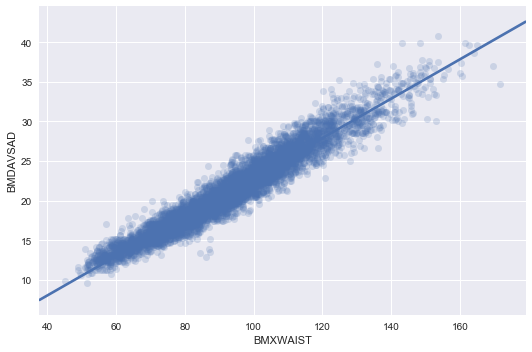

In [35]:
sns.lmplot(x='BMXWAIST', y='BMDAVSAD', data=merge_df, aspect=1.5, scatter_kws={'alpha':0.2})

In [36]:
train_df, test_df = train_test_split(merge_df, test_size=0.2)

In [37]:
print merge_df.shape, train_df.shape, test_df.shape



(6909, 16) (5527, 16) (1382, 16)


In [38]:
X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = train_df['BMDAVSAD']
X_test = test_df.drop('SEQN', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((5527, 15), (5527,), (1382, 15))

# Shape of data

X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

# Linear Regression

logreg = LogisticRegression()
logreg.fit(X_lreg_train, Y_lreg_train)
Y_pred = logreg.predict(X_lreg_test)
pred_log = round(logreg.score(X_lreg_train, Y_lreg_train) * 100, 2)
pred_log

In [39]:
# Shaping Data

#feature_col = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'RIDRETH3_2', 'RIDRETH3_3', 'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2']


X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = train_df['BMDAVSAD']
X_test = test_df.drop('SEQN', axis=1)

In [40]:
print Y_train

3823    29.8
6278    20.1
5981    27.7
5259    22.5
6616    19.3
6915    17.6
3403    20.5
9527    18.4
1383    21.4
4156    27.5
8970    11.9
3999    22.0
1565    24.6
4244    15.0
2179    21.4
697     25.2
3496    22.1
8320    20.2
2139    18.3
6859    22.1
8542    35.1
1331    19.5
3602    12.5
4341    20.2
7413    18.0
7950    12.0
3808    22.1
4648    23.9
1618    23.4
4970    20.3
        ... 
6349    19.0
8486    15.9
1665    19.7
1813    25.7
9372    14.4
2395    16.9
6890    19.8
6369    22.4
3360    18.4
2724    31.6
4319    14.3
3437    23.0
1535    22.6
1155    19.8
1558    15.5
8550    17.8
9407    13.9
2173    20.4
1546    17.4
5023    20.9
440     16.3
556     21.9
5847    22.3
5839    25.7
3401    18.3
5286    21.9
2043    13.5
8036    28.5
9517    20.6
429     19.2
Name: BMDAVSAD, Length: 5527, dtype: float64


In [41]:
# Linear Regression

linreg = LinearRegression()

linreg.fit(X_train, Y_train)
assorted_pred = linreg.predict(X_test)
acc_log = round(linreg.score(X_train, Y_train) * 100, 2)
acc_log


94.05

In [42]:
print linreg.intercept_
print linreg.coef_

5.39693858057
[  1.56491515e-06   1.38612435e-02   4.41620092e-02  -1.42850247e-02
   8.91161521e-02  -7.98966652e-02  -1.12785902e-02  -3.60495659e-02
   1.76743469e-01   1.94824500e-01   1.88671326e-02   7.61933435e-01
  -7.78822742e-02   2.29567371e-01  -5.85756961e-01]


In [43]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*25

array([  5.3969777 ,   5.74346967,   6.50098881,   5.03981296,
         7.62484238,   3.39952195,   5.11497383,   4.49569943,
         9.8155253 ,  10.26755107,   5.8686169 ,  24.44527446,
         3.44988173,  11.13612286,  -9.24698545])

In [44]:
coeff_df = pd.DataFrame(train_df.columns)
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(linreg.coef_)

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
11,RIDRETH3_3,0.761933
13,RIDRETH3_6,0.229567
9,BMDAVSAD,0.194824
8,BMXWAIST,0.176743
4,BMXBMI,0.089116
2,BMXWT,0.044162
10,RIDRETH3_2,0.018867
1,RIDAGEYR,0.013861
0,SEQN,0.000002
6,BMXARML,-0.011279


In [45]:
# Shaping Data for non-linear

#feature_col = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'RIDRETH3_2', 'RIDRETH3_3', 'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2']


X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = np.asarray(train_df['BMDAVSAD'], dtype="|S6")
X_test = test_df.drop('SEQN', axis=1)

In [46]:
Y_train.shape

(5527,)

In [47]:
logreg = LogisticRegression()

# TODO - define X, y, fit it

logreg.fit(X_train, Y_train)
# THEN make predictions on X
assorted_pred_class = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

4.38

# Correlation

In [48]:
coeff_df = pd.DataFrame(train_df.columns)
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
12,RIDRETH3_4,0.034018
14,RIDRETH3_7,0.012544
0,SEQN,0.000243
13,RIDRETH3_6,-0.001392
9,BMDAVSAD,-0.005387
10,RIDRETH3_2,-0.008214
11,RIDRETH3_3,-0.010022
7,BMXARMC,-0.019851
4,BMXBMI,-0.043133
1,RIDAGEYR,-0.044114


# Support Vector Machines

In [49]:
# Shaping Data for non-linear

#feature_col = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'RIDRETH3_2', 'RIDRETH3_3', 'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2']


X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = np.asarray(train_df['BMDAVSAD'])
X_test = test_df.drop('SEQN', axis=1)

In [50]:
# Support Vector Machines

svr = SVR()
svr.fit(X_train, Y_train)
Y_pred = svr.predict(X_test)
acc_svr = round(svr.score(X_train, Y_train) * 100, 2)
acc_svr

28.29

# KNN

In [51]:
# Shaping Data for non-linear

#feature_col = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'RIDRETH3_2', 'RIDRETH3_3', 'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2']


X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = train_df.BMDAVSAD
X_test = test_df.drop('SEQN', axis=1)

In [52]:
# check X's type
print type(X_train)
print type(X_train.values)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [53]:
# check Y's type
print type(Y_train)
print type(Y_train.values)

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


In [54]:
# check X's shape (n = number of observations, p = number of features)
print X_train.shape

(5527, 15)


In [55]:
# check y's shape (single dimension with length n)
print Y_train.shape

(5527,)


In [56]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

91.46

In [57]:
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

100.0

# Gaussian Naive Bayes

In [58]:
# Shaping Data for non-linear

#feature_col = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'RIDRETH3_2', 'RIDRETH3_3', 'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2']


X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = np.asarray(train_df['BMDAVSAD'], dtype="|S6")
X_test = test_df.drop('SEQN', axis=1)

In [59]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


8.97

# Perceptron

In [60]:
# Shaping Data for non-linear

#feature_col = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'RIDRETH3_2', 'RIDRETH3_3', 'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2']


X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = np.asarray(train_df['BMDAVSAD'], dtype="|S6")
X_test = test_df.drop('SEQN', axis=1)

In [61]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

0.49

# Linear SVR

In [62]:
# Shaping Data for non-linear

#feature_col = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'RIDRETH3_2', 'RIDRETH3_3', 'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2']


X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = np.asarray(train_df['BMDAVSAD'])
X_test = test_df.drop('SEQN', axis=1)

In [63]:
# linear SVR

linear_svr = LinearSVR()
linear_svr.fit(X_train, Y_train)
Y_pred = linear_svr.predict(X_test)
acc_linear_svr = round(linear_svr.score(X_train, Y_train) * 100, 2)
acc_linear_svr

62.69

# Stochastic Gradient Descent

In [64]:
# Shaping Data for non-linear

#feature_col = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'RIDRETH3_2', 'RIDRETH3_3', 'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2']


X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = np.asarray(train_df['BMDAVSAD'])
X_test = test_df.drop('SEQN', axis=1)

In [65]:
# check X's type
print type(X_train)
print type(X_train.values)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [66]:
# check Y's type
print type(Y_train)
print type(Y_train)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


# Stochastic Gradient Descent

sgd = SGDRegressor()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

# Decision Tree

In [67]:
# Shaping Data for non-linear

#feature_col = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'RIDRETH3_2', 'RIDRETH3_3', 'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2']


X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = np.asarray(train_df['BMDAVSAD'], dtype=np.float64, order='C')
X_test = test_df.drop('SEQN', axis=1)

In [68]:
# Decision tree

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

# Random Forest

In [69]:
# Shaping Data for non-linear

#feature_col = ['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'RIDRETH3_2', 'RIDRETH3_3', 'RIDRETH3_4', 'RIDRETH3_6', 'RIDRETH3_7', 'RIAGENDR_2']


X_train = train_df.drop('BMDAVSAD', axis=1)
Y_train = np.asarray(train_df['BMDAVSAD'])
X_test = test_df.drop('SEQN', axis=1)

In [70]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.11

# Comparing Prediction Scores

In [73]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
             'Random Forest', 'Naive Bayes', 'Perceptron',
             'Linear SVC',
             'Decision Tree'],
    'Score': [acc_svr, acc_knn, acc_log, acc_random_forest,
             acc_gaussian, acc_perceptron, acc_linear_svr,
             acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,100.00
7,Decision Tree,100.00
3,Random Forest,99.11
6,Linear SVC,62.69
0,Support Vector Machines,28.29
4,Naive Bayes,8.97
2,Logistic Regression,4.38
5,Perceptron,0.49


# Trying Neural Nets

In [ ]:
X = np.array(train_df.drop('BMDAVSAD', axis=1))
y = np.array(train_df['BMDAVSAD'])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import sklearn.model_selection as cv

In [ ]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(units=500, input_dim=264))
model.add(Activation("tanh"))

model.add(Dense(units=264, input_dim=500))
model.add(Activation("tanh"))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(units=3, input_dim=264))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.1))

In [ ]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, nb_epoch=1000, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")